In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\mdtan\Marketing Campaign data.csv")
df.head()

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [5]:
df.shape

(1500, 19)

In [6]:
df.describe()

,CUST_ID,AGE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,102250.500000,38.892000,4.088667,0.253333,0.6280,0.582000,0.575333,0.880667,1.0,0.286667,0.002000
std,433.157015,13.636384,1.920919,0.435065,0.4835,0.493395,0.494457,0.324288,0.0,0.452355,0.044692
min,101501.000000,17.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,101875.750000,28.000000,3.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,102250.500000,37.000000,4.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,102625.250000,47.000000,5.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,103000.000000,90.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


# Data understanding

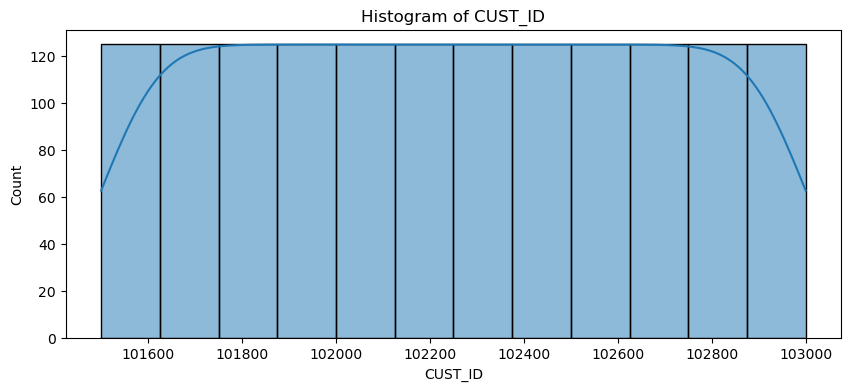

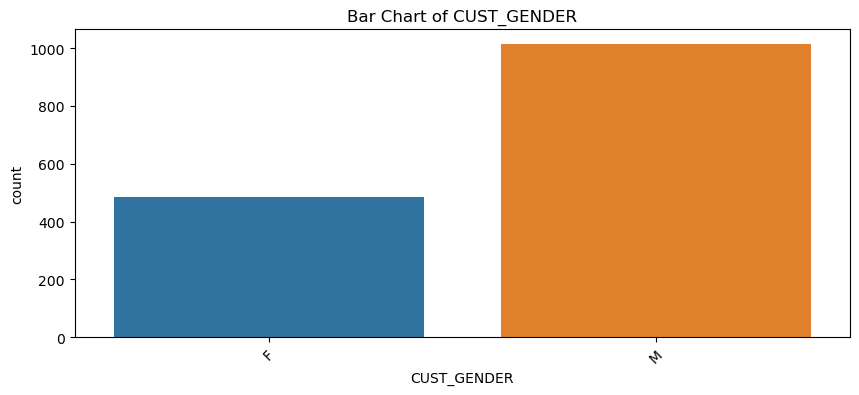

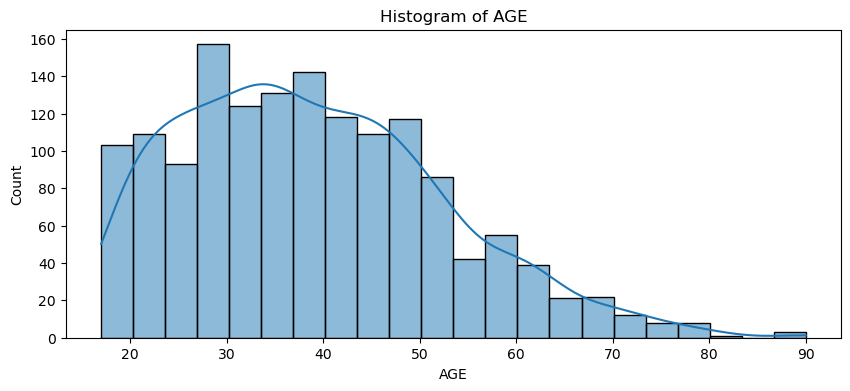

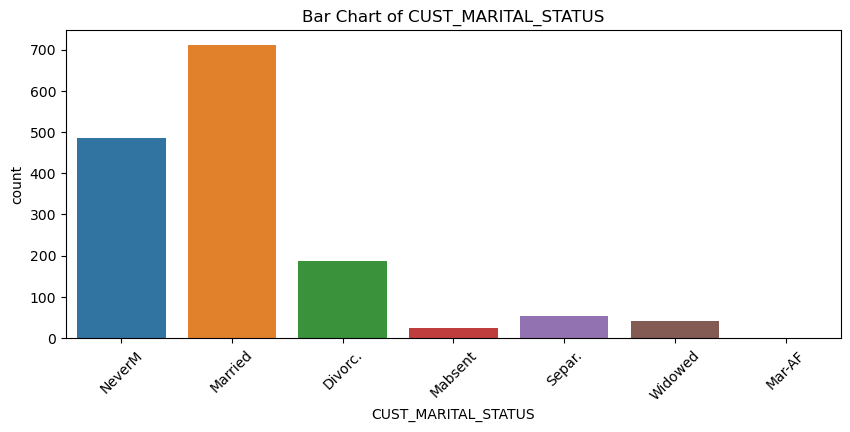

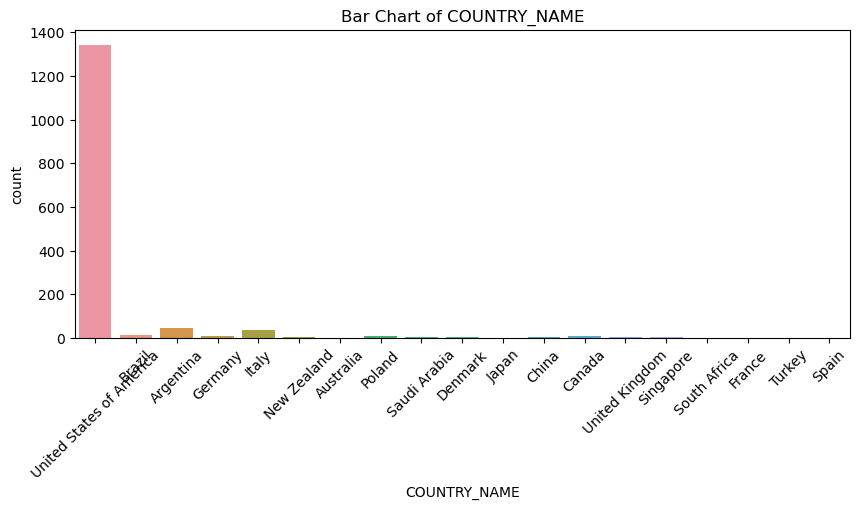

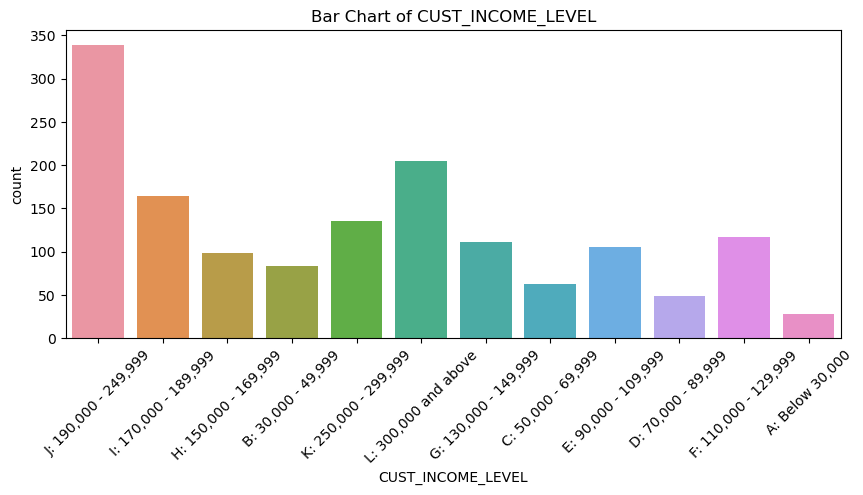

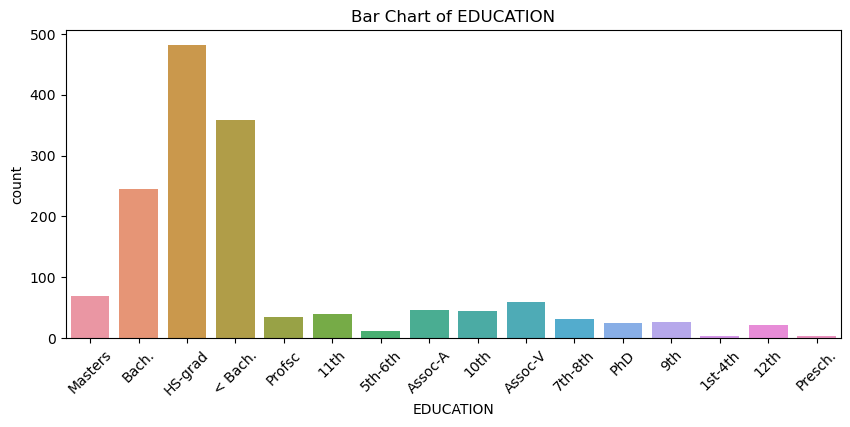

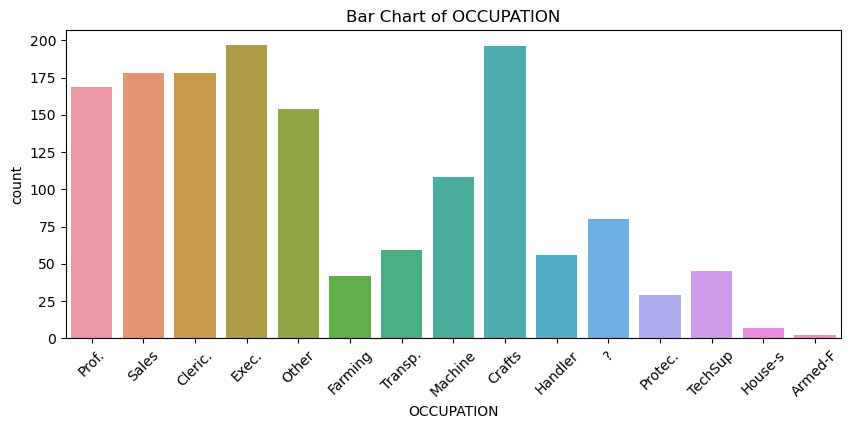

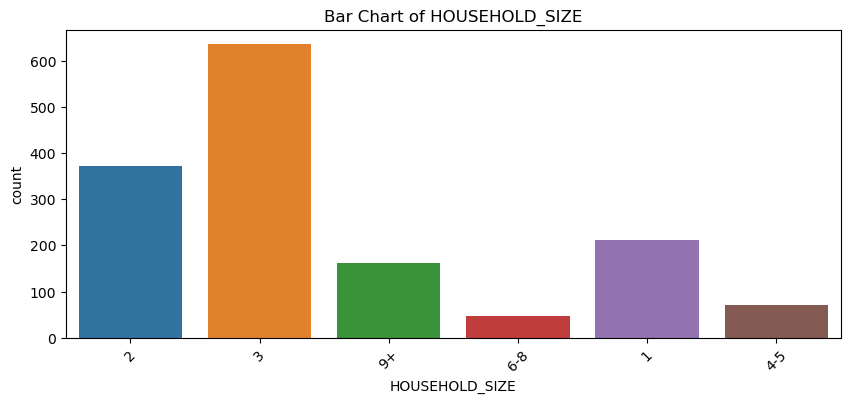

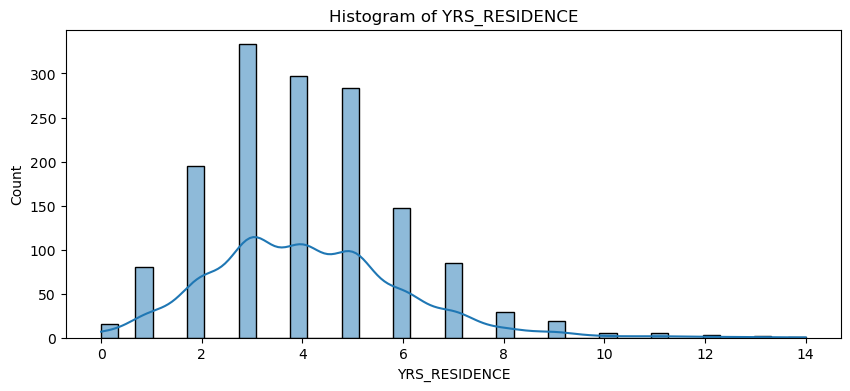

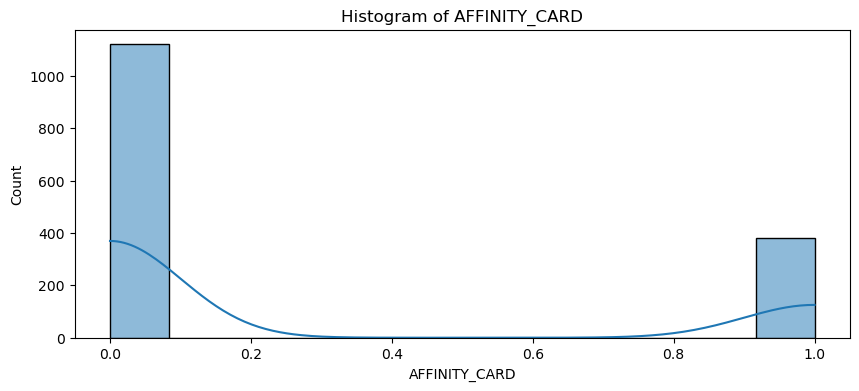

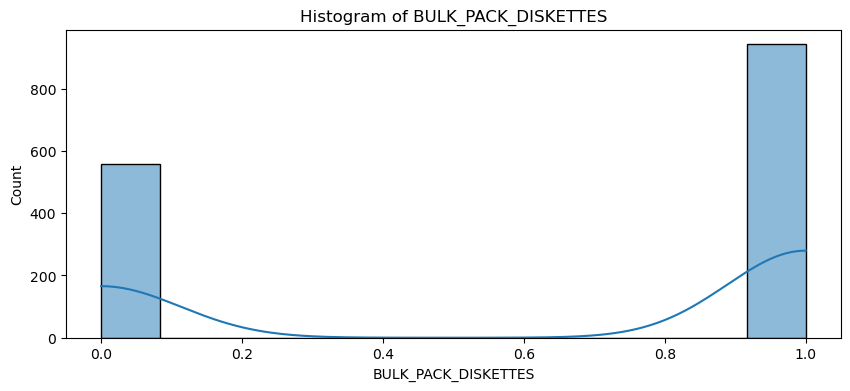

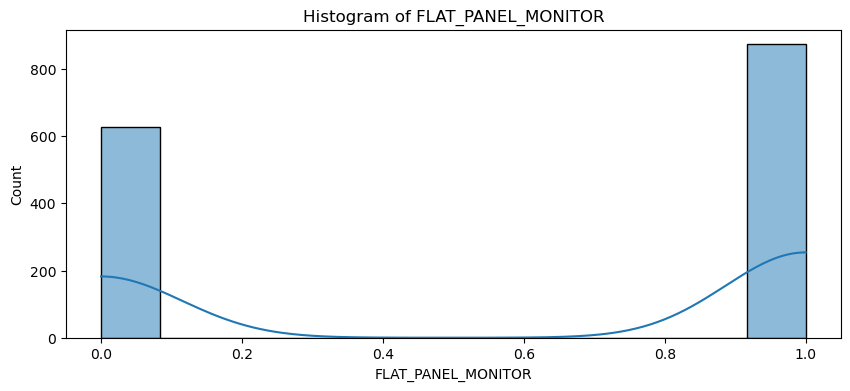

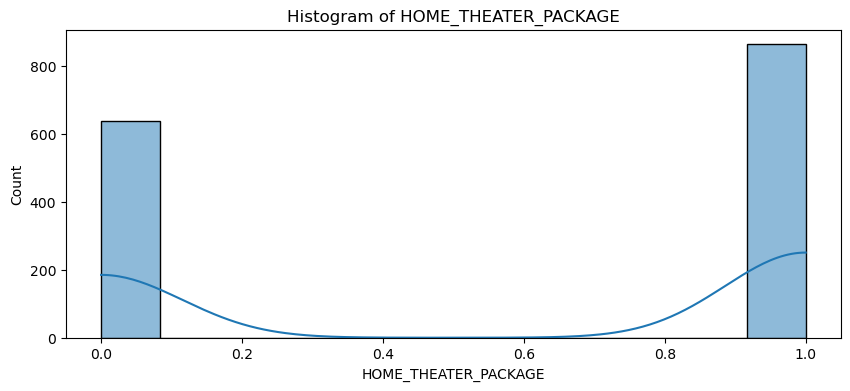

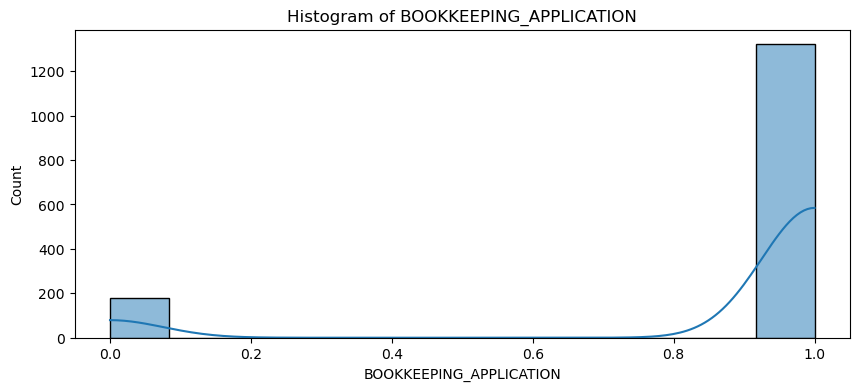

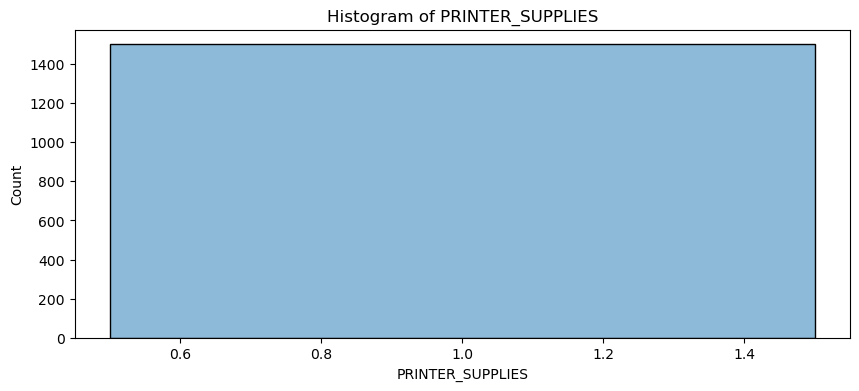

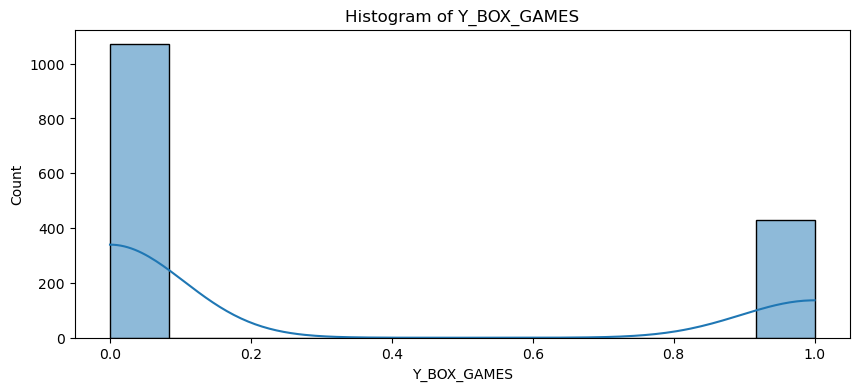

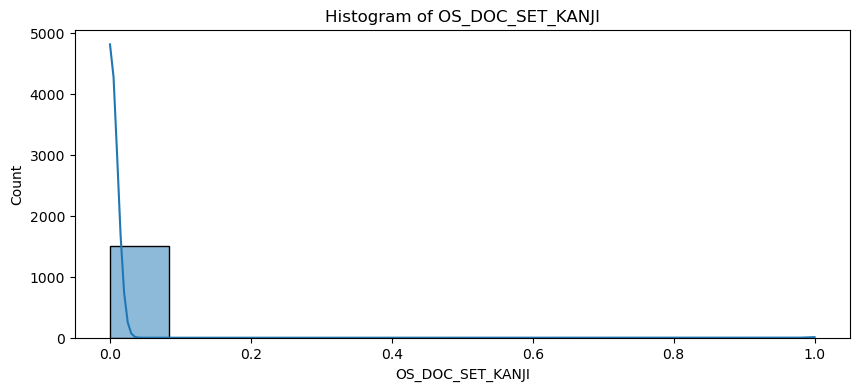

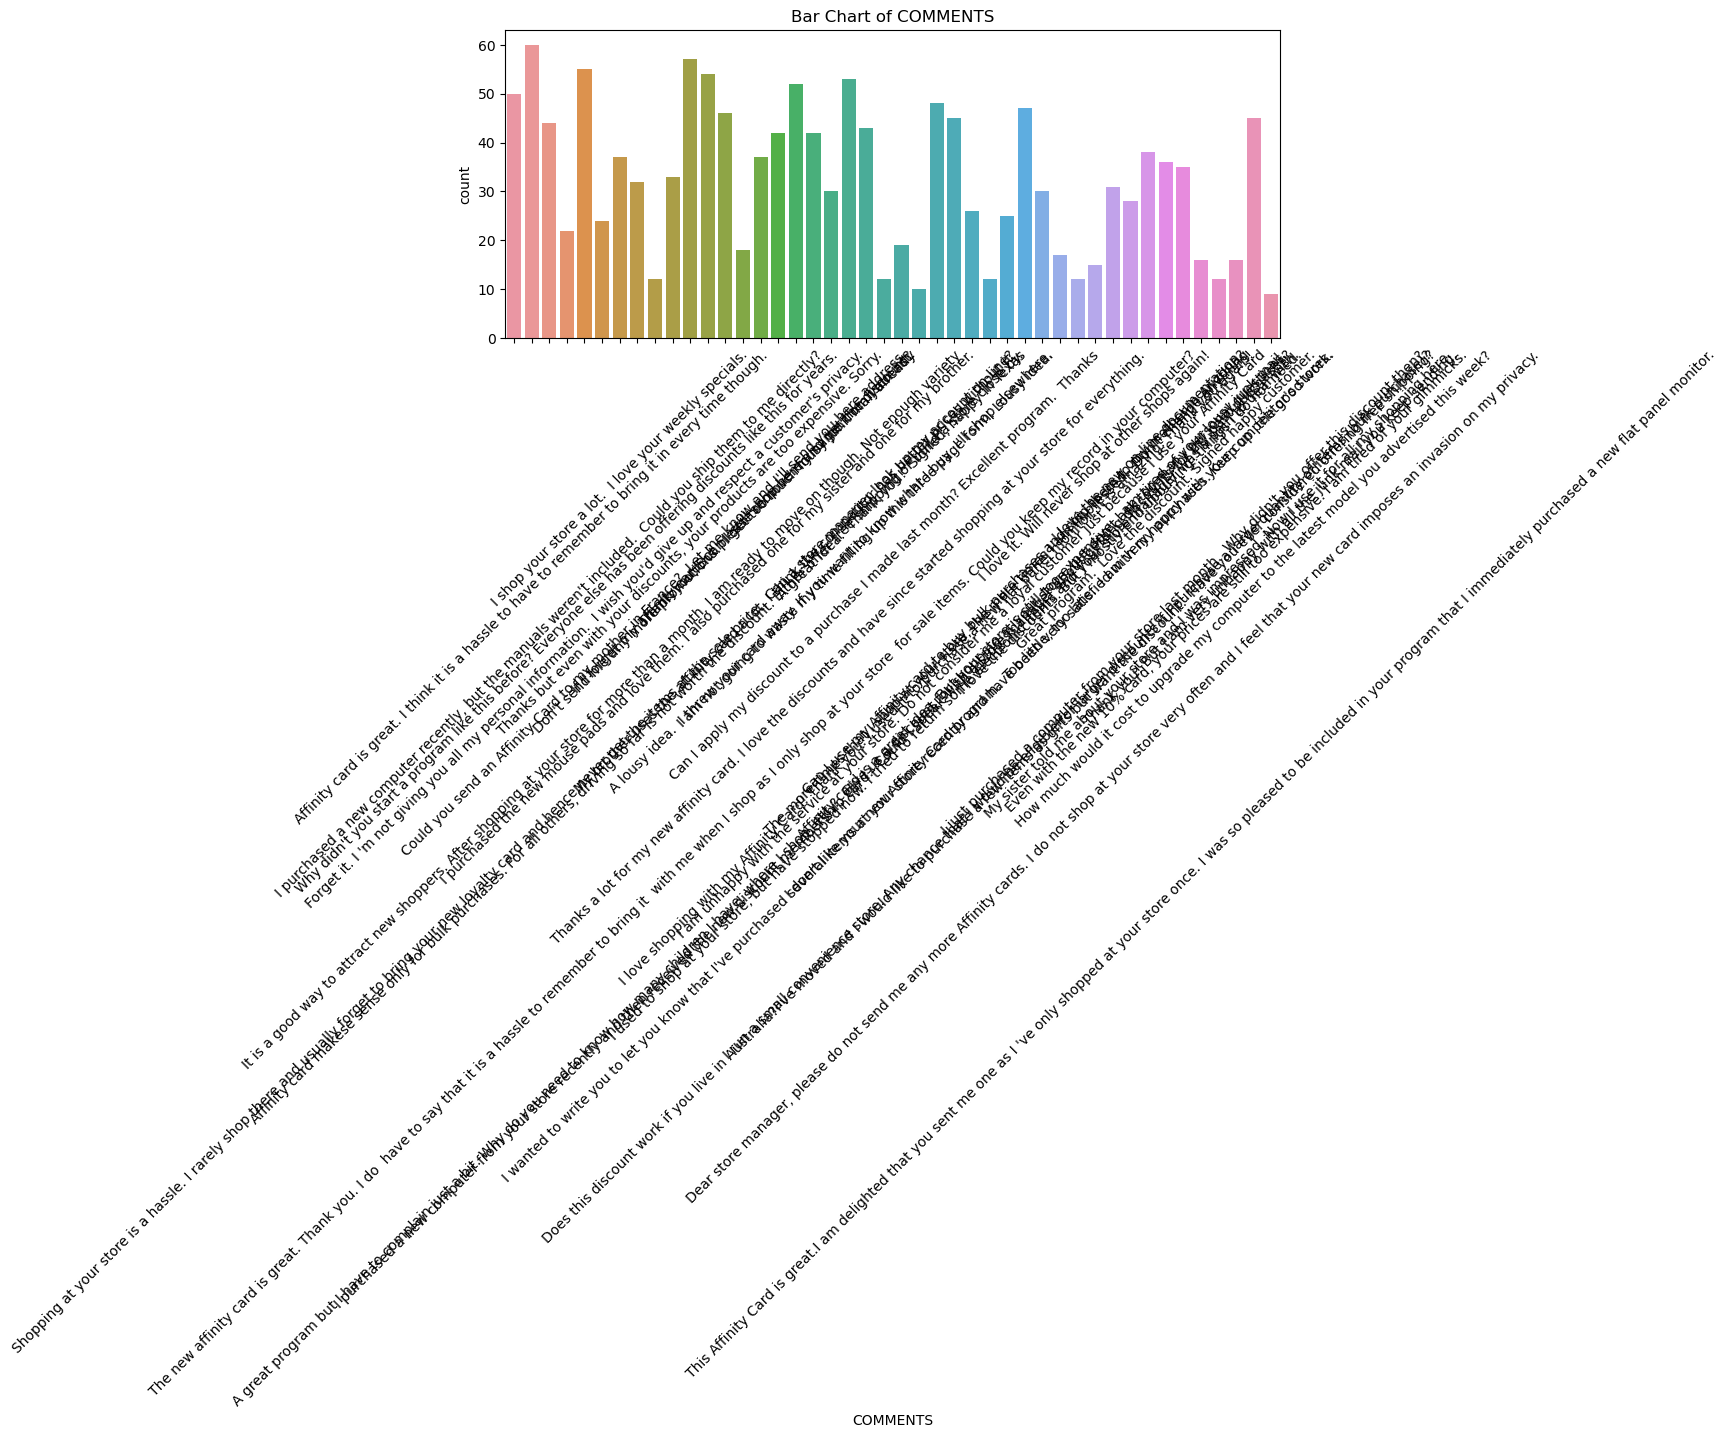

             Attribute Name Descriptions   Maximum   Minimum           Mean  \
0                   CUST_ID      Numeric  103000.0  101501.0  102250.500000   
1               CUST_GENDER      Nominal       NaN       NaN            NaN   
2                       AGE      Numeric      90.0      17.0      38.892000   
3       CUST_MARITAL_STATUS      Nominal       NaN       NaN            NaN   
4              COUNTRY_NAME      Nominal       NaN       NaN            NaN   
5         CUST_INCOME_LEVEL      Nominal       NaN       NaN            NaN   
6                 EDUCATION      Nominal       NaN       NaN            NaN   
7                OCCUPATION      Nominal       NaN       NaN            NaN   
8            HOUSEHOLD_SIZE      Nominal       NaN       NaN            NaN   
9             YRS_RESIDENCE      Numeric      14.0       0.0       4.088667   
10            AFFINITY_CARD      Numeric       1.0       0.0       0.253333   
11      BULK_PACK_DISKETTES      Numeric       1.0  

In [7]:
def meta_data_tabel(df):
  metaData = []

  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      maximum = df[column].max()
      minimum = df[column].min()
      mean = df[column].mean()
      std_deviation = df[column].std()
      mode_value = df[column].mode().iloc[0]

      metaData.append({
          "Attribute Name": column,
          "Descriptions": "Numeric",
          "Maximum": maximum,
          "Minimum": minimum,
          "Mean": mean,
          "Std Deviation": std_deviation,
          "Mode": mode_value
        })

      plt.figure(figsize= (10, 4))
      sns.histplot(df[column].dropna(), kde = True)
      plt.title(f'Histogram of {column}')
      plt.show()

    else:
      mode_value = df[column].mode().iloc[0]
      metaData.append({
          "Attribute Name": column,
          "Descriptions": "Nominal",
          "Data Type": "Nominal",
          "Mode": mode_value
      })

      plt.figure(figsize= (10, 4))
      sns.countplot(x = column, data = df)
      plt.title(f'Bar Chart of {column}')
      plt.xticks(rotation = 45)
      plt.show()

  return pd.DataFrame(metaData)


meta_df = meta_data_tabel(df)
print(meta_df)

##Data Preparatoin

In [8]:
df.head()

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [10]:
data_description = df.describe(include= 'all')
data_description

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
count,1500.000000,1500,1500.000000,1500,1500,1500,1500,1500,1500,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000,1427
unique,NaN,2,NaN,7,19,12,16,15,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44
top,NaN,M,NaN,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Affinity card is great. I think it is a hassle...
freq,NaN,1014,NaN,712,1344,339,482,197,635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
mean,102250.500000,NaN,38.892000,NaN,NaN,NaN,NaN,NaN,NaN,4.088667,0.253333,0.6280,0.582000,0.575333,0.880667,1.0,0.286667,0.002000,NaN
std,433.157015,NaN,13.636384,NaN,NaN,NaN,NaN,NaN,NaN,1.920919,0.435065,0.4835,0.493395,0.494457,0.324288,0.0,0.452355,0.044692,NaN
min,101501.000000,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,NaN
25%,101875.750000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,NaN
50%,102250.500000,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,NaN
75%,102625.250000,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,NaN


# Describe missing or error data

In [11]:
def describe_missing_or_error_data(df):
  for column in df.columns:
    print(f'---{column}---')
    print('Data Summary:')
    print(df[column].value_counts(dropna = False))

    # types of missing or error data
    null_counts = df[column].isna().sum()
    blank_counts = (df[column] == '').sum()
    unknown_counts = (df[column] == 'unknown').sum()

    #printing the missing or error data
    if null_counts > 0:
      print(f"Null values: {null_counts} suggest filling with medain or mode or removing")
    if blank_counts > 0:
      print(f"Blank values: {blank_counts} suggest filling or removing the data")
    if unknown_counts > 0:
      print(f"Unknown values : { unknown_counts} consider replace with np.nan and handle as missing")


    # identifying and handling errors
    if df[column].dtype == "object":
      error_data = pd.to_numeric(df[column], errors='coerce').isna()

      if error_data.sum() > 0:
        print("\nTypes of erroneous Data")
        print(f"Non-numeric entries found in a numeric field: {error_data.sum()}")
        print("suggest correcting or removing non-numeric entries")


    print("\n handling suggestion")

    if df[column].dtype in [np.float64, np.int64]:
      print(f"consider using statistical methods to handle outlier in '{column}'.")
    if df[column].dtype == 'object':
      print(f"standardize text format in '{column}' for consistency")

    print("\n")
dme = describe_missing_or_error_data(df)
print(dme)

---CUST_ID---
Data Summary:
CUST_ID
101501    1
102498    1
102507    1
102506    1
102505    1
         ..
101998    1
101997    1
101996    1
101995    1
103000    1
Name: count, Length: 1500, dtype: int64

 handling suggestion
consider using statistical methods to handle outlier in 'CUST_ID'.


---CUST_GENDER---
Data Summary:
CUST_GENDER
M    1014
F     486
Name: count, dtype: int64

Types of erroneous Data
Non-numeric entries found in a numeric field: 1500
suggest correcting or removing non-numeric entries

 handling suggestion
standardize text format in 'CUST_GENDER' for consistency


---AGE---
Data Summary:
AGE
34    51
27    49
33    46
41    45
46    45
      ..
79     2
80     2
73     2
76     1
82     1
Name: count, Length: 66, dtype: int64

 handling suggestion
consider using statistical methods to handle outlier in 'AGE'.


---CUST_MARITAL_STATUS---
Data Summary:
CUST_MARITAL_STATUS
Married    712
NeverM     485
Divorc.    187
Separ.      52
Widowed     40
Mabsent     23
M

# *#2. Data Preparation *

## remove variable with zero variability

In [12]:
columns_to_remove = [col for col in df.columns if df[col].nunique() == 1]
data_reduced = df.drop(columns = columns_to_remove)
print(f' removed coulmns with no variability: {columns_to_remove}')

 removed coulmns with no variability: ['PRINTER_SUPPLIES']


In [13]:
df.shape

(1500, 19)

# cleaned Data

In [16]:
missing_value = df.isnull().mean()*100
columns_with_missing = missing_value[missing_value > 0].index.tolist()
data_cleaned = data_reduced.dropna(subset=columns_with_missing) if missing_value[columns_with_missing].max() < 5 else data_reduced

print(f"Data after cleaning: {data_cleaned.shape}")

Data after cleaning: (1427, 18)


# basic python code and pandas’ library methods


In [17]:
# Define mappings and functions
gender_map = {'F': 0, 'M': 1}
country_freq = df['COUNTRY_NAME'].value_counts().sort_values().index.tolist()
country_map = {country: i+1 for i, country in enumerate(country_freq)}
household_sizes = {'1': 1, '2': 2, '3': 3, '4-5': 4, '6-8': 5, '9+': 6}
edu_levels = {'Presch.': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5,
              '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, '< Bach.': 10,
              'Assoc-A': 11, 'Assoc-V': 12, 'Bach.': 13, 'Masters': 14, 'Profsc': 15, 'PhD': 16}

def map_income(income):
    if 'Below' in income:
        return 1  # All "Below" thresholds to low income
    elif 'Above' in income:
        return 3  # All "Above" thresholds to high income
    else:
        try:
            #lower bound of the income range
            lower_bound = int(income.split(':')[1].split('-')[0].strip().replace(',', ''))
            if lower_bound < 50000:
                return 1
            elif lower_bound < 150000:
                return 2
            else:
                return 3
        except ValueError:
            return 3

# using Basic Python
df['GENDER_BINARY_BASIC'] = [gender_map[item] for item in df['CUST_GENDER']]
df['COUNTRY_ORDINAL_BASIC'] = [country_map[country] for country in df['COUNTRY_NAME']]
df['EDUCATION_ORDINAL_BASIC'] = [edu_levels[edu] for edu in df['EDUCATION']]
df['HOUSEHOLD_SIZE_ORDINAL_BASIC'] = [household_sizes[size] for size in df['HOUSEHOLD_SIZE']]
df['INCOME_LEVEL_BASIC'] = [map_income(level) for level in df['CUST_INCOME_LEVEL']]

# using Pandas
df['GENDER_BINARY_PANDAS'] = df['CUST_GENDER'].map(gender_map)
df['COUNTRY_ORDINAL_PANDAS'] = df['COUNTRY_NAME'].map(country_map)
df['EDUCATION_ORDINAL_PANDAS'] = df['EDUCATION'].map(edu_levels)
df['HOUSEHOLD_SIZE_ORDINAL_PANDAS'] = df['HOUSEHOLD_SIZE'].replace(household_sizes)
income_bins = [0, 50000, 150000, float('inf')]
df['income_numeric'] = df['CUST_INCOME_LEVEL'].apply(lambda x: x.split(':')[1].split('-')[0].strip().replace(',', '') if '-' in x else (300000 if 'Above' in x else 10000))
df['income_numeric'] = df['income_numeric'].astype(int)
df['INCOME_LEVEL_PANDAS'] = pd.cut(df['income_numeric'], bins=income_bins, labels=[1, 2, 3], right=False)


df[['GENDER_BINARY_BASIC', 'GENDER_BINARY_PANDAS',
      'COUNTRY_ORDINAL_BASIC', 'COUNTRY_ORDINAL_PANDAS',
      'EDUCATION_ORDINAL_BASIC', 'EDUCATION_ORDINAL_PANDAS',
      'HOUSEHOLD_SIZE_ORDINAL_BASIC', 'HOUSEHOLD_SIZE_ORDINAL_PANDAS',
      'INCOME_LEVEL_BASIC', 'INCOME_LEVEL_PANDAS', 'income_numeric']].head()

,GENDER_BINARY_BASIC,GENDER_BINARY_PANDAS,COUNTRY_ORDINAL_BASIC,COUNTRY_ORDINAL_PANDAS,EDUCATION_ORDINAL_BASIC,EDUCATION_ORDINAL_PANDAS,HOUSEHOLD_SIZE_ORDINAL_BASIC,HOUSEHOLD_SIZE_ORDINAL_PANDAS,INCOME_LEVEL_BASIC,INCOME_LEVEL_PANDAS,income_numeric
0,0,0,19,19,14,14,2,2,3,3,190000
1,1,1,19,19,13,13,2,2,3,3,170000
2,0,0,19,19,9,9,2,2,3,3,150000
3,1,1,19,19,13,13,3,3,1,1,30000
4,1,1,19,19,14,14,6,6,3,3,250000


# 3. Data analysis

In [18]:
#Checking the data type and identify the numeric columns
numeric_columns = df.select_dtypes(include= ['number']).columns

#calculate the summary statistic of sum, mean, std, skew, kurtosis
summary_statistics = df[numeric_columns].agg(['sum', 'mean', 'std', 'skew', 'kurtosis'])
print(summary_statistics)

               CUST_ID           AGE  YRS_RESIDENCE  AFFINITY_CARD  \
sum       1.533758e+08  58338.000000    6133.000000     380.000000   
mean      1.022505e+05     38.892000       4.088667       0.253333   
std       4.331570e+02     13.636384       1.920919       0.435065   
skew      0.000000e+00      0.594253       0.775118       1.135444   
kurtosis -1.200000e+00      0.004432       1.596695      -0.711719   

          BULK_PACK_DISKETTES  FLAT_PANEL_MONITOR  HOME_THEATER_PACKAGE  \
sum                942.000000          873.000000            863.000000   
mean                 0.628000            0.582000              0.575333   
std                  0.483500            0.493395              0.494457   
skew                -0.530180           -0.332835             -0.305118   
kurtosis            -1.721206           -1.891745             -1.909451   

          BOOKKEEPING_APPLICATION  PRINTER_SUPPLIES  Y_BOX_GAMES  ...  \
sum                   1321.000000            1500.0   4

# 4. Data exploration

CUST_ID
CUST_GENDER
AGE
CUST_MARITAL_STATUS
COUNTRY_NAME
CUST_INCOME_LEVEL
EDUCATION
OCCUPATION
HOUSEHOLD_SIZE
YRS_RESIDENCE
AFFINITY_CARD
BULK_PACK_DISKETTES
FLAT_PANEL_MONITOR
HOME_THEATER_PACKAGE
BOOKKEEPING_APPLICATION
PRINTER_SUPPLIES
Y_BOX_GAMES
OS_DOC_SET_KANJI
COMMENTS
GENDER_BINARY_BASIC
COUNTRY_ORDINAL_BASIC
EDUCATION_ORDINAL_BASIC
HOUSEHOLD_SIZE_ORDINAL_BASIC
INCOME_LEVEL_BASIC
GENDER_BINARY_PANDAS
COUNTRY_ORDINAL_PANDAS
EDUCATION_ORDINAL_PANDAS
HOUSEHOLD_SIZE_ORDINAL_PANDAS
income_numeric
INCOME_LEVEL_PANDAS
Enter the variable name to plot a histogram or type 'exit' to quit:AGE


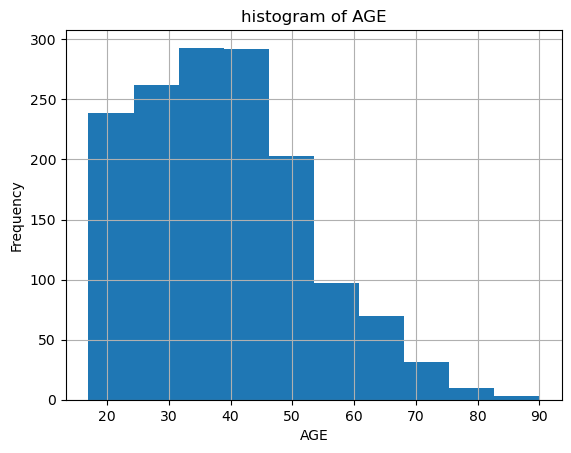

CUST_ID
CUST_GENDER
AGE
CUST_MARITAL_STATUS
COUNTRY_NAME
CUST_INCOME_LEVEL
EDUCATION
OCCUPATION
HOUSEHOLD_SIZE
YRS_RESIDENCE
AFFINITY_CARD
BULK_PACK_DISKETTES
FLAT_PANEL_MONITOR
HOME_THEATER_PACKAGE
BOOKKEEPING_APPLICATION
PRINTER_SUPPLIES
Y_BOX_GAMES
OS_DOC_SET_KANJI
COMMENTS
GENDER_BINARY_BASIC
COUNTRY_ORDINAL_BASIC
EDUCATION_ORDINAL_BASIC
HOUSEHOLD_SIZE_ORDINAL_BASIC
INCOME_LEVEL_BASIC
GENDER_BINARY_PANDAS
COUNTRY_ORDINAL_PANDAS
EDUCATION_ORDINAL_PANDAS
HOUSEHOLD_SIZE_ORDINAL_PANDAS
income_numeric
INCOME_LEVEL_PANDAS
Enter the variable name to plot a histogram or type 'exit' to quit:exit
exiting the program


In [19]:
def histogram_plot(column):
  df[column].hist()
  plt.title(f"histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

if __name__ == "__main__":
    while True:
      for col in df.columns:
        print(col)

      user_input = input("Enter the variable name to plot a histogram or type 'exit' to quit:")
      if user_input.lower() == 'exit':
        print("exiting the program")
        break

      elif user_input in df.columns:
        histogram_plot(user_input)

      else:
        print("variable is not found. try again")

# Data Mining

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [21]:
#1000 records from the dataset
sampled_data = df.sample(n = 1000, random_state= 42)
features = sampled_data [['CUST_GENDER', 'AGE', 'COUNTRY_NAME', 'EDUCATION']]
target_variable = sampled_data['AFFINITY_CARD']

featured = features.copy()
for column in ['CUST_GENDER', 'COUNTRY_NAME', 'EDUCATION']:
  featured[column] = LabelEncoder().fit_transform(features[column])

X_train, X_test, Y_train, Y_test = train_test_split(featured, target_variable, test_size = 0.3, random_state= 42 )

X_train.head()
Y_train.head()

1018    1
1133    1
873     1
296     0
1035    0
Name: AFFINITY_CARD, dtype: int64

In [22]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)

#prediction
y_prediction = model.predict(X_test)

#accuracy
test_accuracy = accuracy_score(Y_test, y_prediction)
test_accuracy

0.78

# To build the prediction model

In [23]:
def create_model():
  model = LogisticRegression()
  gender_encoder = LabelEncoder()
  country_encoder = LabelEncoder()
  education_encoder = LabelEncoder()

  return model, gender_encoder, country_encoder, education_encoder

In [24]:
def prediction_make():
  df["CUST_GENDER"] = gender_encoder.transform(df["CUST_GENDER"])
  df["COUNTRY_NAME"] = country_encoder.transform(df["COUNTRY_NAME"])
  df["EDUCATION"] = education_encoder.transform(df["EDUCATION"])
  prediction = model.predict(df)
  return "Affinity Card Holder" if prediction == 1 else "Not an Affinity Card Holder"

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer

In [26]:
# Selecting features and targets
features = df.drop(columns=['CUST_ID', 'COMMENTS', 'AFFINITY_CARD', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE'])
targets = df[['AFFINITY_CARD', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE']]


In [27]:
# Preprocessing for numerical data
numeric_features = ['AGE', 'YRS_RESIDENCE']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [28]:
# Preprocessing for categorical data
categorical_features = [col for col in features.columns if col not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [29]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=1000, random_state=42, stratify=targets)


In [31]:
# Create a logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=500)
multi_target_model = MultiOutputClassifier(logistic_regression)


In [32]:
# Create a full pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', multi_target_model)])

In [33]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'YRS_RESIDENCE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CUST_GENDER',
                                                   'CUST...
                                                   'GENDER_BINARY_BASIC',
                                                   'COUNTRY_ORDINAL_BASIC',
                                                   'EDUCATION_ORDINAL_BASIC',
                                                   'HOUSEHOLD_SIZE_ORDINAL_BASIC',
                                                   'INCOME_LEVEL_BASIC',
                                                   'GENDER_BINARY_PANDAS',
                                                   'COUNTRY_ORDINAL_PANDAS',
                                                   'EDUCATION_ORDINAL_PANDAS',
                                                   'HOUSEHOLD_SIZE_ORDINAL_PANDAS',
                                                   'income_numeric',
                                                   'INCOME_LEVEL_PANDAS'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=500)))])

In [34]:
def predict_from_input(data):
    try:
        # Assuming data is a DataFrame
        predictions = pipeline.predict(data)
        return predictions
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None


In [35]:
def input_direct():
    print("Enter customer details:")
    input_data = {}
    for feature in X_train.columns:
        value = input(f"Enter {feature}: ")
        input_data[feature] = [value]
    input_df = pd.DataFrame(input_data)
    return input_df

In [36]:
def input_from_file():
    try:
        input_df = df.copy()
        return input_df
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None

In [37]:
def main():
    choice = input("Type 'direct' to enter data manually, or 'file' to load from a CSV file: ")
    if choice.lower() == 'direct':
        input_df = input_direct()
    elif choice.lower() == 'file':
        input_df = input_from_file()
    else:
        print("Invalid input. Exiting.")
        return

    if input_df is not None:
        predictions = predict_from_input(input_df)
        if predictions is not None:
            print("Predictions:")
            print("AFFINITY_CARD | FLAT_PANEL_MONITOR | HOME_THEATER_PACKAGE")
            for prediction in predictions:
                print(f"{prediction[0]} | {prediction[1]} | {prediction[2]}")
        else:
            print("Failed to make predictions.")

if __name__ == "__main__":
    main()

Type 'direct' to enter data manually, or 'file' to load from a CSV file: file
Predictions:
AFFINITY_CARD | FLAT_PANEL_MONITOR | HOME_THEATER_PACKAGE
0 | 1 | 1
0 | 1 | 0
0 | 0 | 0
1 | 0 | 1
0 | 1 | 0
0 | 1 | 1
0 | 1 | 0
0 | 1 | 0
0 | 1 | 1
0 | 1 | 0
0 | 0 | 0
0 | 1 | 0
1 | 1 | 0
0 | 1 | 1
0 | 1 | 0
1 | 0 | 0
0 | 1 | 1
0 | 1 | 0
0 | 1 | 1
0 | 0 | 1
0 | 1 | 1
0 | 1 | 1
0 | 1 | 0
0 | 1 | 1
0 | 1 | 0
1 | 1 | 1
0 | 1 | 0
0 | 1 | 1
0 | 1 | 0
1 | 0 | 0
0 | 1 | 0
0 | 0 | 1
0 | 0 | 1
0 | 0 | 1
0 | 1 | 0
0 | 0 | 1
1 | 0 | 0
1 | 1 | 1
0 | 1 | 1
0 | 1 | 1
0 | 0 | 1
0 | 0 | 1
0 | 0 | 1
0 | 1 | 0
0 | 1 | 1
0 | 1 | 1
0 | 0 | 1
0 | 0 | 0
1 | 1 | 1
0 | 1 | 1
1 | 1 | 1
0 | 0 | 0
0 | 0 | 1
1 | 1 | 1
0 | 0 | 1
0 | 0 | 1
0 | 1 | 1
0 | 1 | 0
1 | 0 | 1
1 | 0 | 1
0 | 1 | 0
0 | 1 | 1
0 | 1 | 1
1 | 1 | 1
0 | 1 | 0
0 | 1 | 1
0 | 0 | 1
0 | 0 | 0
1 | 1 | 1
1 | 1 | 1
0 | 1 | 0
0 | 0 | 1
0 | 1 | 0
1 | 0 | 1
0 | 1 | 0
0 | 1 | 0
1 | 0 | 0
0 | 1 | 1
1 | 0 | 1
0 | 0 | 1
1 | 1 | 1
0 | 1 | 1
0 | 1 | 1
0 | 1 | 0
0 | 0 | 0
0

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
# Predicting on the test set
predictions_test = pipeline.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test, average='micro')
f1 = f1_score(y_test, predictions_test, average='micro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7880
Recall: 0.9078
F1 Score: 0.9195
